## Importando as bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Funcoes Utilizadas

In [14]:
#Funcao simples que mostra uma imagem na tela
def show_img(image):
    plt.figure()
    plt.imshow(image)

    

def img_to_grey(imagem):
    return cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)


def bin_otsu(imagem):
    return cv2.threshold(imagem, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

def gaussian_blur(imagem):
    value = (35, 35)
    return cv2.GaussianBlur(imagem, value, 0)

def find_contorn(img_bin):
    contours = ""
    (version, _, _) = cv2.__version__.split('.')
    if version == '3':
        image, contours, hierarchy = cv2.findContours(img_bin.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    #Estamos caindo aqui
    elif version == '2' or version == '4':
        contours, hierarchy = cv2.findContours(img_bin.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    cnt = max(contours, key = lambda x: cv2.contourArea(x))
    return cnt

def find_img_contorn(imagem, contorn):
    return cv2.drawContours(imagem.copy(), [contorn], 0, (0, 255, 0), 3)

def create_rectangle(imagem, cnt):
    x, y, w, h = cv2.boundingRect(cnt)
    return cv2.rectangle(imagem, (x,y), (x+w, y+h), (0, 0, 255), 3)

def contorn_convexo(imagem, cnt):
    hull = cv2.convexHull(cnt)
    #cv2.imwrite('res3.png', imagem)
    return cv2.drawContours(imagem, [hull], 0, (0, 0, 255), 3)

## Imagem de teste

### Pré-Processamento

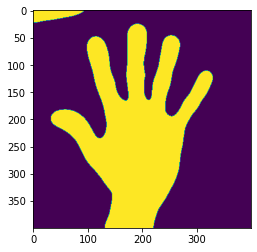

In [8]:
imagem_teste = "base1/mao5.jpg"
imagem = cv2.imread(imagem_teste)
#Aplicando binarizacao de OTSU
#_, thresh1 = cv2.theshold(grey, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

#show_img(imagem)

img_grey = img_to_grey(imagem)
#show_img(img_grey)

img_gaus = gaussian_blur(img_grey)
#show_img(img_gaus)

img_bin = bin_otsu(img_gaus)
show_img(img_bin)


### Contorno

array([[[188, 188, 188],
        [188, 188, 188],
        [188, 188, 188],
        ...,
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205]],

       [[188, 188, 188],
        [188, 188, 188],
        [188, 188, 188],
        ...,
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205]],

       [[188, 188, 188],
        [188, 188, 188],
        [188, 188, 188],
        ...,
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205]],

       ...,

       [[232, 231, 233],
        [232, 231, 233],
        [232, 231, 233],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]],

       [[232, 231, 233],
        [232, 231, 233],
        [232, 231, 233],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]],

       [[232, 231, 233],
        [232, 231, 233],
        [232, 231, 233],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]]

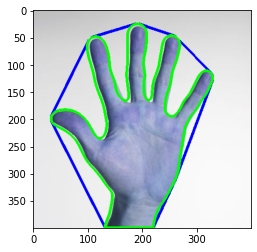

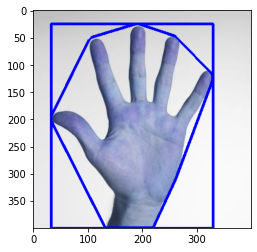

In [15]:
#Passando a imagem binarizada para encontrar o contorno
contorno = find_contorn(img_bin)

#Passando uma copia da imagem original para contornar
img_contorn = find_img_contorn(imagem.copy(), contorno)

show_img(img_contorn)

img_rect = create_rectangle(imagem.copy(), contorno)
show_img(img_rect)

contorn_convexo(imagem.copy(), contorno)